In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\preet\Desktop\portcast\sample.csv")
df.head()

,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,...,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810
0,11667,14976,15623,14809,16495,11980,17264,13222,7500,5539,...,11992,12461,18500,15183,16257,17749,13842,6220,4462,8741


In [2]:
#declaring vars
n_weeks=6


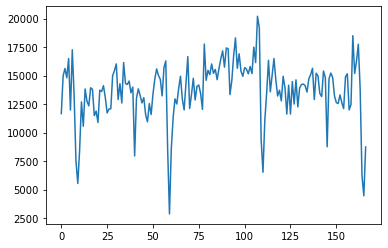

In [3]:
plt.plot(df.values.reshape(df.shape[1],))
plt.show()

In [4]:
dff=pd.DataFrame(df.values.reshape(df.shape[1],),columns=['y'])
dff['ds']=df.columns
dff.head()

,y,ds
0,11667,201501
1,14976,201502
2,15623,201503
3,14809,201504
4,16495,201505


In [5]:
from isoweek import Week
step1_ds=pd.DataFrame(dff['y'],columns=['y'])
step1_ds['ds']=[Week((int(int(x)/100)),int(x)%100).sunday() for x in dff['ds']]
step1_ds.head()

,y,ds
0,11667,2015-01-04
1,14976,2015-01-11
2,15623,2015-01-18
3,14809,2015-01-25
4,16495,2015-02-01


In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *
from sklearn.preprocessing import StandardScaler
def predict_future(dff,n_weeks=6):
    gp=GaussianProcessRegressor(kernel=RationalQuadratic())
    scaler=StandardScaler()
    dff['y_scaled']=scaler.fit_transform(dff[['y']])
    x=[]
    y=[]
    for i in range(len(dff['y_scaled'])-50):
        x.append(dff['y_scaled'][i:i+50])
        y.append(dff['y_scaled'][i+50])
    x=np.array(x)
    y=np.array(y)
    gp.fit(x,y)
    y_scaled=dff['y_scaled'].values
    yy=dff['y'].values
    for i in range(n_weeks):
        x_test=y_scaled[-50:]
        y_pred=gp.predict([x_test])
        y_scaled=np.append(y_scaled,y_pred[0])
        y_pred_scaled=scaler.inverse_transform(y_pred)
        yy=np.append(yy,y_pred_scaled[0])
    temp_df=pd.DataFrame(yy[-n_weeks:],columns=['y'])
    temp_df['ds']=[int((dff['ds'].values)[-1])+i for i in range(1,n_weeks+1)]
    temp_df['y_scaled']=y_scaled[-n_weeks:]
    dff=dff.append(temp_df)
    dff.drop(['y_scaled'],axis=1,inplace=True)
    return dff

In [10]:
output_df=predict_future(dff,n_weeks=n_weeks)

C:\Users\preet\Miniconda3\envs\ml\lib\site-packages\sklearn\gaussian_process\kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


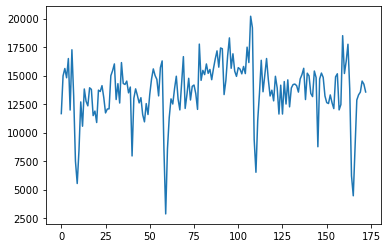

In [12]:
line2=plt.plot([x for x in range(len(output_df.y))],output_df.y)
plt.show()

C:\Users\preet\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


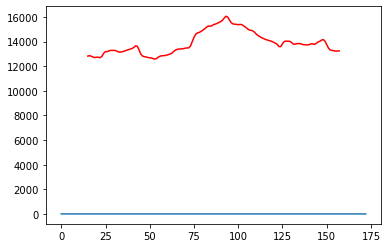

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(output_df.y.values,model='multiplicative',freq=30)
trend=decomposition.trend
seasonal=decomposition.seasonal
plt.plot(trend,color='red')
plt.plot(seasonal)
plt.show()

C:\Users\preet\Miniconda3\envs\ml\lib\site-packages\sklearn\gaussian_process\kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


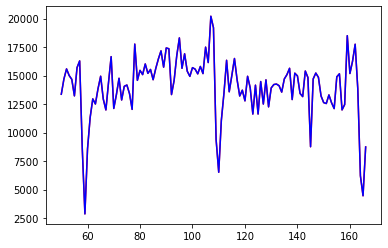

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *
from sklearn.preprocessing import StandardScaler
def extract_trends(dff):
    gp=GaussianProcessRegressor(kernel=RationalQuadratic())
    scaler=StandardScaler()
    dff['y_scaled']=scaler.fit_transform(dff[['y']])
    x=[]
    y=[]
    for i in range(len(dff['y_scaled'])-50):
        x.append(dff['y_scaled'][i:i+50])
        y.append(dff['y_scaled'][i+50])
    x=np.array(x)
    y=np.array(y)
    gp.fit(x,y)
    y_preds=gp.predict(x)
    y_preds_scaled=scaler.inverse_transform(y_preds)
    diff=[]
    for i in range(len(y_preds_scaled)):
        diff.append(y_preds_scaled[i]-dff.y[i])
    dff.drop(dff.iloc(0)[:50].index,inplace=True)
    dff['y_preds']=y_preds_scaled
    dff['diff']=diff
    dff.drop(['y_scaled'],axis=1,inplace=True)
    return dff
dff=extract_trends(dff)
line1=plt.plot(dff['y'],'r')
line2=plt.plot(dff.y_preds,'b')
plt.show()

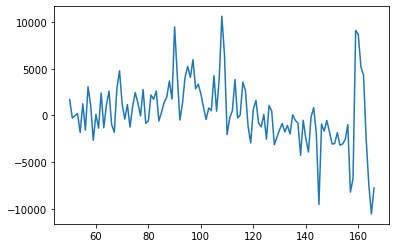

In [34]:
plt.plot(dff['diff'])
plt.show()

In [35]:
dff.head(n=20)

,y,ds,y_preds,diff
50,13366,201551,13366.000000,1699.000000
51,14699,201552,14699.000000,-277.000000
52,15586,201553,15586.000000,-37.000000
53,15006,201601,15006.000000,197.000000
54,14670,201602,14670.000000,-1825.000000
55,13221,201603,13221.000000,1241.000000
56,15697,201604,15697.000000,-1567.000000
57,16287,201605,16287.000000,3065.000000
58,8577,201606,8577.000001,1077.000001
59,2873,201607,2873.000001,-2665.999999
